In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from collections import Counter
from tqdm import tqdm


from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [136]:
num_hospitals = 7
ref_locations = np.random.randint(1,10, (num_hospitals,2))
ref_capacities = np.random.randint(100,2000, (num_hospitals,))

usage = np.random.randint(100,300, (num_hospitals,))
transfers = np.random.randint(0,20, (num_hospitals,num_hospitals))



In [137]:
x = np.where(transfers>0) # non-zero transfers

whichToKeep = np.random.randint(0,2, (43)) # boolean list
whichToKeep = np.where(whichToKeep==1)[0] # index list
# x[0]

transfers[(x[0][whichToKeep],x[1][whichToKeep])] = 0
transfers

array([[ 0,  5, 16,  0,  0,  7,  0],
       [ 7, 14,  7,  7,  0,  0, 11],
       [10, 11,  0,  4, 17, 16, 11],
       [ 0, 18,  0,  6,  1,  0,  0],
       [13,  0,  0,  0,  0,  0,  7],
       [18,  0,  0,  0, 13,  0,  0],
       [ 0, 11,  0, 18,  4,  9,  0]])

In [138]:
transfers = np.zeros((num_hospitals,num_hospitals))
transfers[0,3] = 70
transfers[1,5] = 170
transfers[2,5] = 30
transfers[0,1] = 10


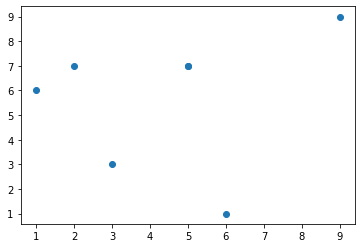

In [139]:
plt.scatter(ref_locations[:,0], ref_locations[:,1])

In [154]:
import PIL.Image as Image 
import numpy as np

im = Image.open('netherlands.png')
# im.shape
pix = np.array(im)

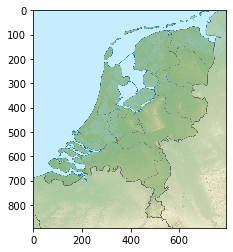

In [155]:
plt.imshow(pix)

In [141]:
https://upload.wikimedia.org/wikipedia/commons/e/ee/Netherlands_relief_location_map.svg

SyntaxError: invalid syntax (<ipython-input-141-cf28babae0b8>, line 1)

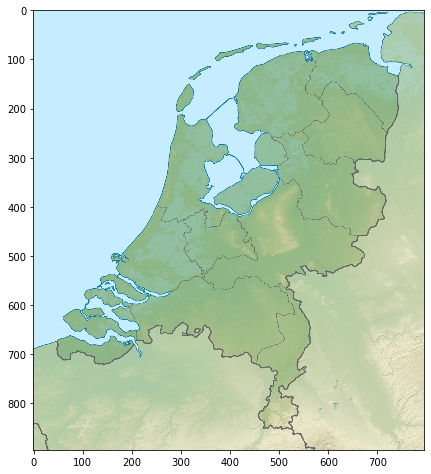

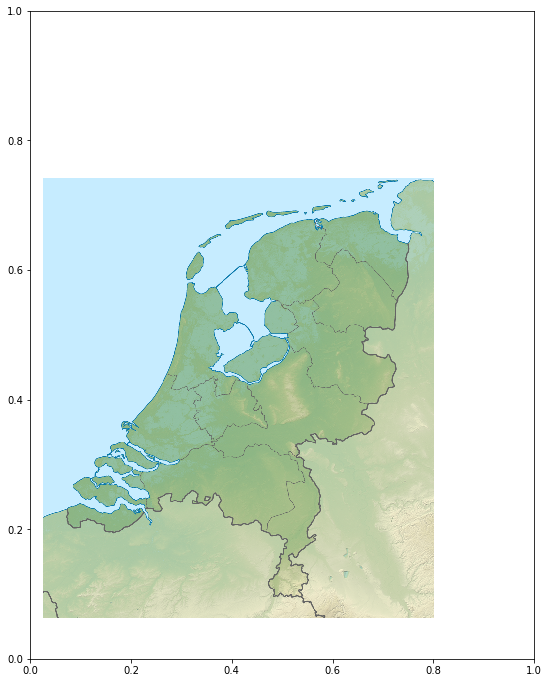

In [165]:
fig = plt.figure(figsize=(7,9))
ax = plt.gca()
ax.imshow(pix)
ax.axis('off')

ax = fig.add_axes([0.1, 0.1, 1, 1], zorder=-1)
# newax.imshow(im)


In [173]:
pix.shape

(895, 795, 4)

[9 9] 772 153 0.5 1
[3 3] 1818 241 0.5 1
[6 1] 664 156 0.5 1
[2 7] 116 139 0.5 1
[1 6] 1710 287 0.5 1
[5 7] 1218 111 0.5 1
[5 7] 394 267 0.5 1
0 1 [9 9] [3 3]
0 3 [9 9] [2 7]
1 5 [3 3] [5 7]
2 5 [6 1] [5 7]


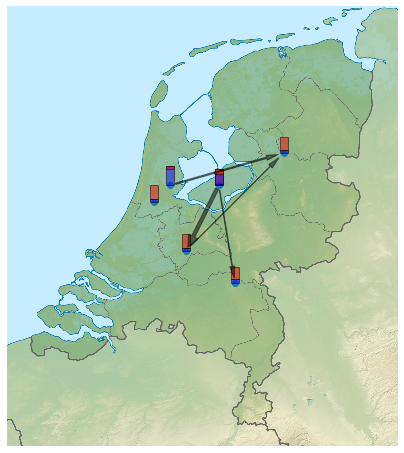

In [188]:
def plot_hospital(xy, capacity, usage, width=1, height=1, ax=None):
    if ax is None:
        ax = plt.gca()
    print( xy, capacity, usage, width, height)
    
    h = height*(usage/capacity)
    
    r1 = Rectangle((xy[0]-width/2, xy[1]), width, h)
    pc = PatchCollection([r1], facecolor='blue', alpha=.5, edgecolor='black')
    
    ax.add_collection(pc)

    r2 = Rectangle((xy[0]-width/2, xy[1]+h), width, height-h)
    pc = PatchCollection([r2], facecolor='red', alpha=.5, edgecolor='black')
    
    ax.add_collection(pc)
    
    
def plot_hospitals(ref_locations, ref_capacities, ref_usage, width, height, ax=None):
    if ax is None:
        ax = plt.gca()

    for h in range(ref_locations.shape[0]):
        plot_hospital(*(list(zip(*[ref_locations, ref_capacities, ref_usage]))[h]), width, height)

        
def plot_transfers(ref_locations, transfers, ax=None):
    if ax is None:
        ax = plt.gca()

    arrowWidthPerTransfer = 0.02
    for (i, j) in itertools.product(range(transfers.shape[0]), range(transfers.shape[1])):
        if i != j and transfers[i,j] > 0:
            print(i, j, ref_locations[i],  ref_locations[j])
            ax.annotate('', 
                        xy=ref_locations[i],
                        xytext=ref_locations[j],
                        arrowprops=
                        dict(
                            facecolor='black'
                            , shrink=0.05
                            , alpha=.5
                            ,width = arrowWidthPerTransfer*transfers[i,j]
                            ,headwidth = max(3*arrowWidthPerTransfer*transfers[i,j],5)
                            ))
    
fig = plt.figure(figsize=(7,9))
ax = plt.gca()
ax.imshow(pix, extent=(-8,16,-9,18))
ax.axis('off')

# ax = fig.add_axes([0.1, 0.1, 1, 1], zorder=2, alpha=.8)
# newax.imshow(im)

ax.scatter(ref_locations[:,0], ref_locations[:,1])
plot_hospitals(ref_locations, ref_capacities, usage, .5, 1, ax=ax)
plot_transfers(ref_locations, transfers, ax=ax)
# plt.xlim(0,11)
# plt.ylim(0,11)

In [135]:
list(zip(*[ref_locations, ref_capacities, ref_usage]))[0]

(array([8, 1]), 209, 274)